# Домашнее задание 3 (numpy)

Инструкция по сдаче ДЗ: работайте в Google Colab 1) нажмите кнопку выше "Open in Colab" 2) нажмите Copy to Drive. После чего необходимо до дедлайна сделать Share по ссылке с функцией редактирования (Edit) и отправить эту ссылку в форму: https://forms.gle/sbqctKNQtUadNXCh6

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy`
- `scipy`
- `matplotlib`

Подключить их можно следующим образом:

In [ ]:
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

## Часть 2. Базовые операции линейной алгебры [2 балла]

### Основные операции с матрицами [1 балл]

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:


**Задание 2.1** Создайте нулевую матрицу $Z$ размера $3\times4$ [0.125 балла]

In [ ]:
np.zeros((3, 4), int)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

**Задание 2.2** Создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5 [0.125 балла]

In [ ]:
A = np.identity(5, int)
np.fill_diagonal(A, [1, 2, 3, 4, 5])
A

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

**Задание 2.3** Найдите след матрицы [0.125 балла]

In [ ]:
np.trace(A)

15

**Задание 2.4** Найдите обратную к ней матрицу [0.125 балла]

In [ ]:
np.linalg.inv(A)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2       ]])

**Задание 2.5** Сгенерируйте случайную матрицу $X$ размера $4\times5$ [0.125 балла]

In [ ]:
B = np.random.rand(4, 5)
B

array([[0.19225926, 0.85105126, 0.63991636, 0.84721683, 0.28239793],
       [0.75265047, 0.7040637 , 0.9231188 , 0.9398568 , 0.81811529],
       [0.6392169 , 0.71722461, 0.25233694, 0.86864976, 0.00176853],
       [0.04277086, 0.77245813, 0.94285331, 0.17473668, 0.88315216]])

**Задание 2.6** Найдите траспонированную к ней матрицу [0.125 балла]

In [ ]:
B_T = B.T
B_T

array([[0.19225926, 0.75265047, 0.6392169 , 0.04277086],
       [0.85105126, 0.7040637 , 0.71722461, 0.77245813],
       [0.63991636, 0.9231188 , 0.25233694, 0.94285331],
       [0.84721683, 0.9398568 , 0.86864976, 0.17473668],
       [0.28239793, 0.81811529, 0.00176853, 0.88315216]])

**Задание 2.7** Найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$ [0.125 балла]

In [ ]:
X = B[np.ix_([1, 2], [0, 1])]
np.linalg.det(X)

0.08977002469786037

**Задание 2.8** Найдите произведение $X^TX$. [0.125 балла]

In [ ]:
X.dot(X.T)

array([[1.06218844, 0.98607872],
       [0.98607872, 0.92300939]])

### Эффективность [1 балл]

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а, кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [ ]:
def my_det(X):
    if X.shape[0] != X.shape[1]:
        raise ValueError
    n = X.shape[0]
    A = X.copy().astype(float)
    for fd in range(n): 
        if A[fd, fd] == 0: 
                A[fd, fd] = 1.0e-18 # change to ~zero
        for i in range(fd+1,n): 
            crScaler = A[i, fd] / A[fd, fd]
            A[i, :] = A[i, :] - crScaler * A[fd, :]        
    return round(A.diagonal().prod(), 10)

Простая проверка

In [ ]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


Теперь проверим, что функция работает корректно на случайных матрицах. Если ваша функция работает верно, то вы не должны получить `FAILED` ни на одном из тестов.

In [ ]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

The slowest run took 4.52 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 50 µs per loop
1000 loops, best of 5: 420 µs per loop
The slowest run took 11.48 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 636 µs per loop
10 loops, best of 5: 93.7 ms per loop
10 loops, best of 5: 41.1 ms per loop


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


1 loop, best of 5: 2.89 s per loop


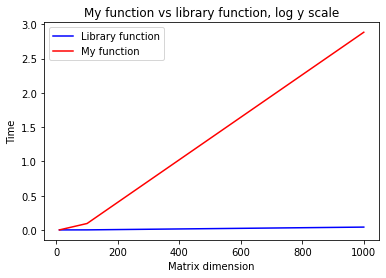

In [ ]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

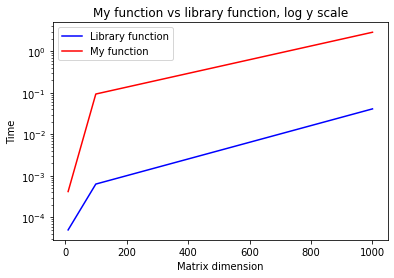

In [ ]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Комплексные числа [3 балла]

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 3.1** [0.5 балла] Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="https://files.catbox.moe/ejdj2c.png">

**Задание 3.2** [0.5 балла] Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 3.3** [0.5 балла] Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [ ]:
def shrink_rotate(x, a, coef=1., angle=0.):
    return (x - a) * coef * np.exp(1j * angle) + a
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    return np.conj((x - a) * coef * np.exp(1j * angle) + a)
    
def geometric_inverse(x, a, r):
    coef = r**2 / ((x - a).real**2 + (x - a).imag**2)
    return a + (x - a)*coef

**Задание 3.4** [0.5 балла] Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Дополните этот код и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

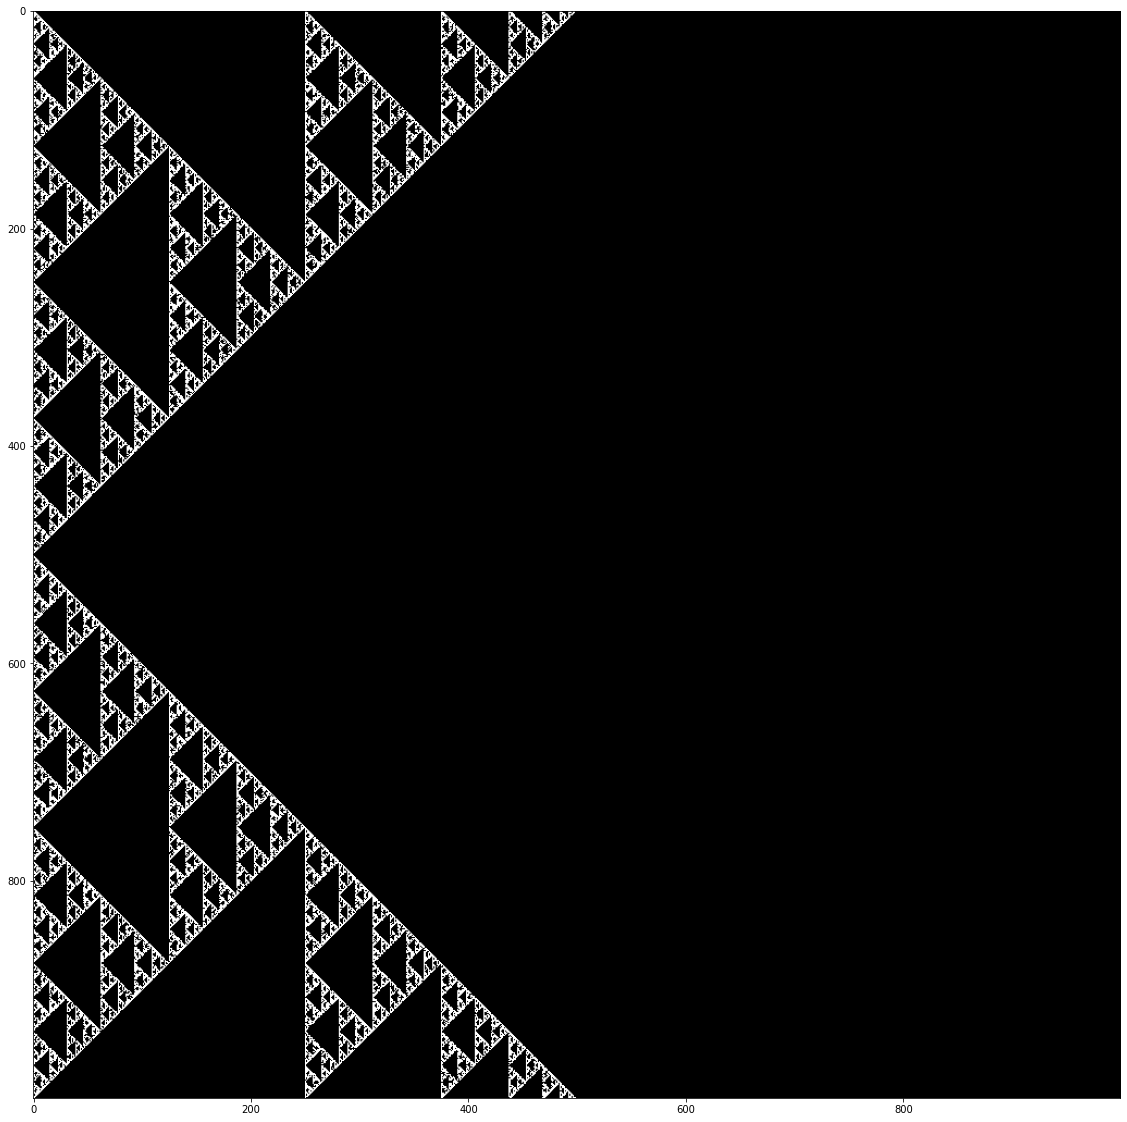

In [ ]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
n = 1000
matrix = np.zeros((n, n))
interval = 2 / n

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >=10:
        matrix[int(z.real / interval), int(z.imag / interval)] = 1

plt.figure(figsize=(20, 20))
plt.imshow(matrix, cmap='gray')

**Задание 3.5** [1 балл] Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

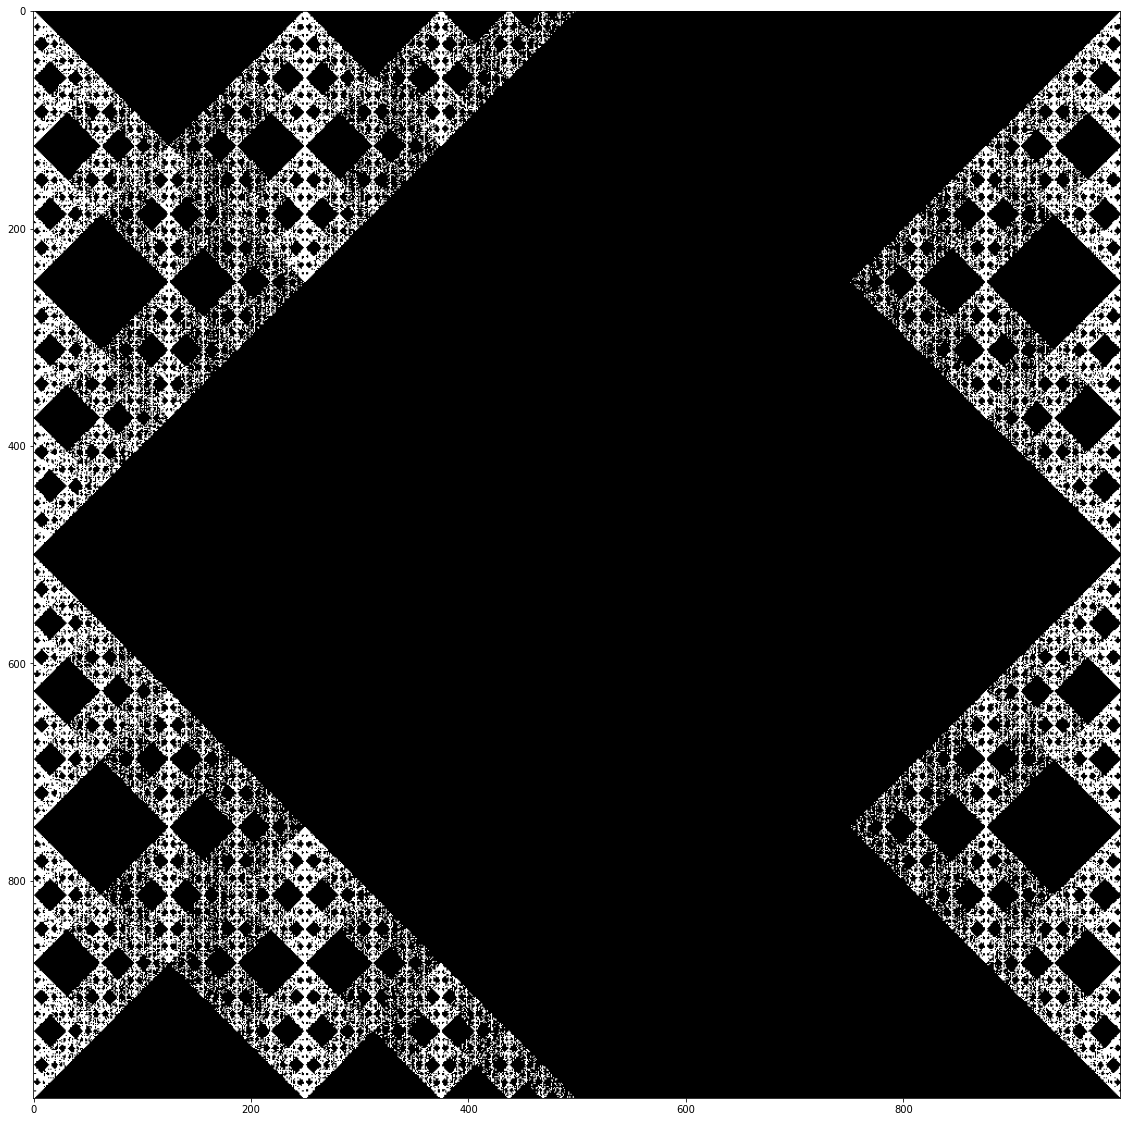

In [ ]:
z = 1. + 1.*1j
max_iter = 500000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
n = 1000
matrix = np.zeros((n, n))
interval = 2 / n

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >=10:
        matrix[int(z.real / interval), int(z.imag / interval)] = 1

plt.figure(figsize=(20, 20))
plt.imshow(matrix, cmap='gray')

## Часть 4. Сингулярное разложение и его приложения [3 балла]

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ --- ортогональная матрица размера $m\times m$, $V$ --- ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ --- диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле, требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ --- ортогональная матрица размера $m\times k$, $V^T$ --- ортогональная матрица размера $k\times n$, $\Sigma$ --- диагональная матрица размера $k\times k$, причём $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем вам использовать

`import scipy.linalg.as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Обращаем ваше внимание на то, что `U, S, Vt` - это соответственно матрицы $U$, $\Sigma$ и $V^T$ (не забывайте про это $^T$). Параметр `full_matrices` отвечает за то, будет ли сингулярное разложение полным или усечённым. 

**Задание 4** Сжатие данных с помощью SVD

In [ ]:
import numpy as np
from skimage.io import imread

img = imread('https://github.com/svdcvt/math_python_hse/raw/master/fall-2021/homeworks/img.jpg')
img = img.mean(axis=2)

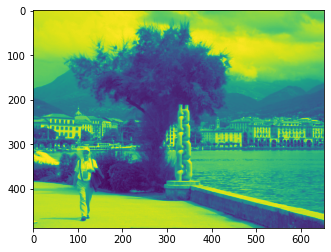

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

**Задание 4.1** Постройте сингулярное разложение этой матрицы. [0.5 балла]

In [ ]:
U, s, Vt = sla.svd(img, full_matrices=False)

**Задание 4.2**  Нарисуйте график диагональных элементов матрицы $\Sigma$: [0.5 балла]

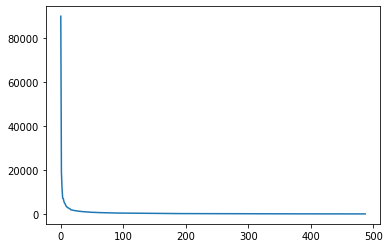

In [ ]:
plt.plot(s)


**Задание 4.3** [1 балл]
Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

Визуализуйте первую компоненту ранга 1. Ожидали ли вы увидеть именно это? Почему?

Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

**Важно:** пожалуйста, сделайте это с помощью только матричных операций, без циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

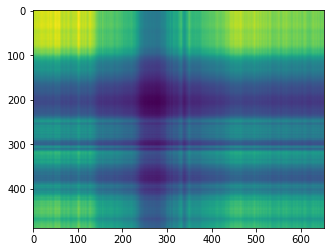

In [ ]:
Sigma = np.identity(len(s))
for i in range(len(s)):
    Sigma[i, i] = s[i]
k = 1
approx = U[:, :k] @ Sigma[:k, :k] @ Vt[:k, :]
plt.imshow(approx)

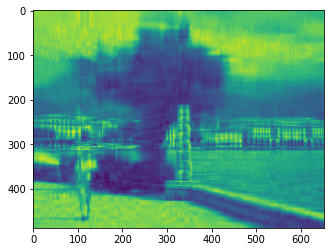

In [ ]:
k = 20
approx = U[:, :k] @ Sigma[:k, :k] @ Vt[:k, :]
plt.imshow(approx)

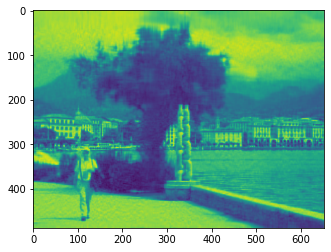

In [ ]:
k = 50
approx = U[:, :k] @ Sigma[:k, :k] @ Vt[:k, :]
plt.imshow(approx)

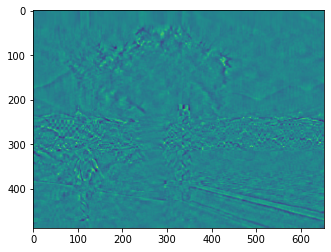

In [ ]:
a, b = 20, 100
approx = U[:, a:b] @ Sigma[a:b, a:b] @ Vt[a:b, :]
plt.imshow(approx)

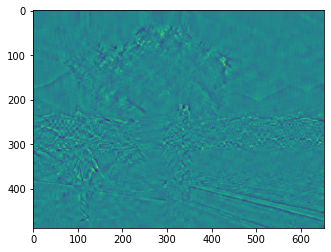

In [ ]:
approx = U[:, 20:] @ Sigma[20:, 20:] @ Vt[20:, :]
plt.imshow(approx)

Можно было догадаться, что картинки будут примерно такими. Так как примерно на интервале [0, 20] график диагональных элементов матрицы $\Sigma$  быстро убывает, причем значение первого диагонального элемента много больше значения последнего диагонального элемента. Поэтому первые 20 компонет вносят наибольший вклад в восстановлние исходного изображения (исходной матрицы).

**Задание 4.4** [1 балл]
Как вам кажется, сколько первых главных компонент нужно взять для достаточно хорошего восстановления исходного изображения? Во сколько раз меньше памяти потребуется для их хранения?

In [ ]:
img.shape

(488, 653)

Думаю, что 50 главных компонент вполне достаточно для хорошего восстановления изображения. 

Исходная матрица имела 488 строк и 653 столбца $\Rightarrow 488 * 653 = 318644$ элемента исходной матрицы . Каждый столбец $u_i$ имеет 488 элементов, каждый $v_i$ - 653 элемента. Мы берем 50 главных компонент $\Rightarrow 50*(1 + 480 + 653) = 56 700$ элементов. Значит, число элементов 50 первых компонент примерно в 5.6 раза меньше исходного числа элементов матрицы, то есть нам потребуется примерно в 5.6 раз меньше памяти для хранения.

## Часть 5. Построение регрессии с помощью Гауссовского процесса [2 балла]

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['matrix', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
# import seaborn as sbs
import numpy as np

### Генерация выборки

Ответ на очередном объекте $x_i$ генерируется следующим образом:

$$t_i = f(x_i)+\varepsilon_i, \; \varepsilon_i \sim \mathcal{N}(0,\sqrt{2})$$

In [ ]:
def f(x):
    return -8*np.sin(x)

support = np.arange(-1.0, 11.0, 1e-2)

In [ ]:
X_train = np.arange(0, 10.0, 0.5)
X_train = X_train.reshape([len(X_train), -1])
Y_train = f(X_train)
T_train = Y_train + 2*np.random.randn(*X_train.shape)

X_test = support
X_test = X_test.reshape([len(X_test), -1])

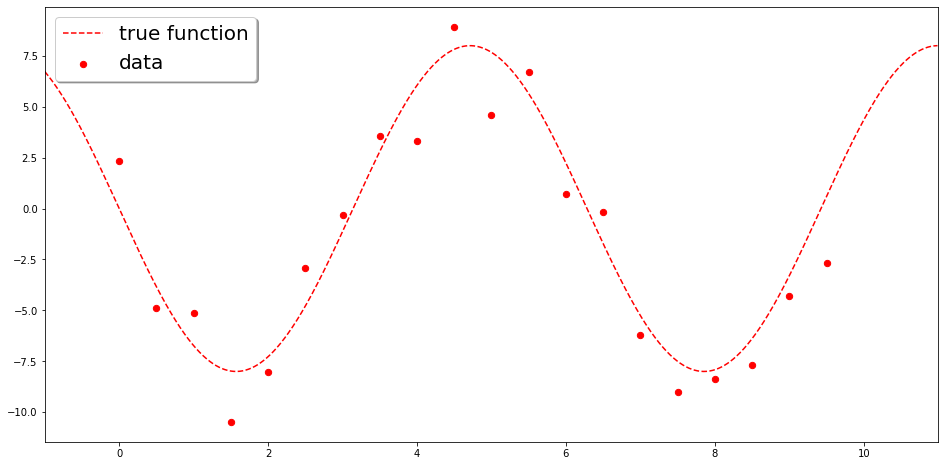

In [ ]:
figsize(16,8)
plt.scatter(X_train.flatten(), T_train.flatten(), label='data', c='r', s=40)
plt.plot(support, f(support), '--r', label='true function')
plt.legend(fontsize=20, frameon=True, shadow=True)
plt.xlim(np.min(support), np.max(support))
plt.show()

### Предсказание

В тестовой точке $x$ мы можем предсказать два параметра – мат. ожидание $\mu(x)$ и стандартное отклонение $\sigma(x)$.
Для заданной ковариационной функции $k(x,y)$ и для заданной дисперсии случайного шума $\beta^{-1}$, $\mu(x), \sigma(x)$ вычисляются по следующим формулам:

$$\mu(x) = \mathbf{k}^TC_N^{-1}\mathbf{t}, \;\;\;\; \sigma^2(x) = k(x,x)+\beta^{-1}-\mathbf{k}^TC_N^{-1}\mathbf{k},$$

где $\mathbf{k} = k(x_i, x)$ – вектор, состоящий из элементов $k(x_i, x), \; i=1,\ldots,N$,  
$\mathbf{t} = (t_1,\ldots,t_N)$ – вектор ответов на обучающей выборке,  
$С_N = \mathbf{K} + \beta^{-1}E$, где $\mathbf{K}_{ij} = k(x_i,x_j)$ – ковариационная матрица.

Примеры ковариационных функций:
- $K(x,y) = C$ – константная,
- $K(x,y) = \sum_{j=1}^d\theta_jx_jy_j$ – линейная,
- $K(x,y) = \exp(-\sum_{j=1}^d\theta_j(x_j-y_j)^2)$  – экспоненциальная,
- $K(x,y) = \exp(-\sum_{j=1}^d\theta_j|x_j-y_j|)$ – процесс Орнштейна-Уленбека.

**Задание 5.1** [2 балла] Реализуте функции вычисления ковариационных матриц между двумя произвольными выборками объектов, а затем функцию, вычисляющую предсказание в новой точке. Циклы использовать запрещено.

**Полезные ссылки**:

https://note.nkmk.me/en/python-numpy-newaxis/

https://realpython.com/numpy-array-programming/

https://scipy-lectures.org/advanced/advanced_numpy/

In [ ]:
def linear_k(X, Y, theta):
    '''
    X: [N x D]
    Y: [M x D]
    theta: [D]
    
    out: [N x M]
    '''
    return  X @ np.diag(theta) @ Y.T
    
def rbf_k(X, Y, theta):
    return  np.exp(- np.diag(X @ np.diag(theta) @ X.T).reshape(-1, 1) + 2 * X @ np.diag(theta) @ Y.T - np.diag(Y @ np.diag(theta) @ Y.T).reshape(1, -1))

def ou_k(X, Y, theta):
    N, M = X.shape[0], Y.shape[0]
    return np.exp(-np.absolute(np.zeros([N, M]) + X @ np.diag(theta).reshape(-1, 1) - (Y @ np.diag(theta).reshape(1, -1)).reshape(1, -1)))

def predict(X_train, T_train, X_test, theta, beta, kernel):
    '''
    X_train, T_train : [N x D], [N x 1]
    X_test: [M x D]
    theta: [1]
    '''
    k_vec = kernel(X_train, X_test, theta)
    k_mat = kernel(X_train, X_train, theta)
    C_n = np.identity(len(k_mat)) / beta + k_mat
    mu = k_vec.T @ sla.inv(C_n) @ T_train
    var = np.diag(kernel(X_test, X_test, theta)).reshape(-1, 1) + beta ** (-1) - np.diag(k_vec.T @ np.linalg.inv(C_n) @ k_vec).reshape(-1, 1)
    return mu, var


In [ ]:
def plot_result():
    figsize(9,5)
    plt.scatter(X_train.flatten(), T_train.flatten(), label='data', c='r', s=40)
    plt.plot(support, f(support), '--r', label='true function')
    plt.plot(X_test, mu_test, c='b', label='mu test')
    plt.fill_between(X_test.flatten(), (mu_test-sigma_test).flatten(), (mu_test+sigma_test).flatten(), color='b', label='confidence', alpha=0.3)
    plt.legend(fontsize=12, frameon=True, shadow=True)
    plt.xlim(np.min(support), np.max(support))

### Экспоненциальная ковариационная функция

In [ ]:
theta = np.array([1.0])
beta = 100.0

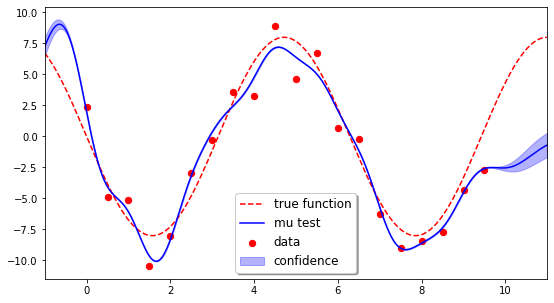

In [ ]:
kernel = rbf_k
mu_test, sigma_test = predict(X_train, T_train, X_test, theta, beta, kernel)
plot_result()

### Линейная ковариационная функция

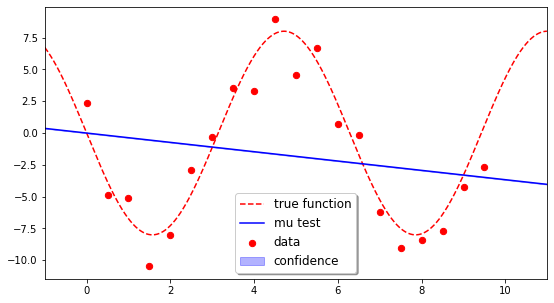

In [ ]:
kernel = linear_k
mu_test, sigma_test = predict(X_train, T_train, X_test, theta, beta, kernel)
plot_result()

### Процесс Орнштейна-Уленбека

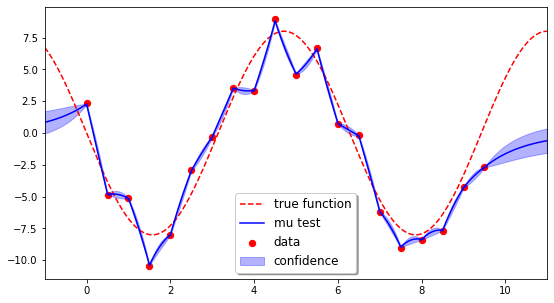

In [ ]:
kernel = ou_k
mu_test, sigma_test = predict(X_train, T_train, X_test, theta, beta, kernel)
plot_result()

Посмотрим как ведёт себя регрессия для разных значений $\beta$

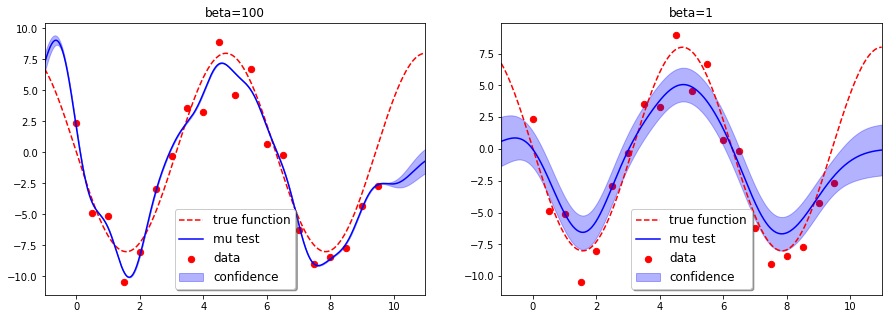

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('beta=100')
theta = np.array([1.0])
beta = 100.0
kernel = rbf_k
mu_test, sigma_test = predict(X_train, T_train, X_test, theta, beta, kernel)
plot_result()
plt.subplot(122)
plt.title('beta=1')
theta = np.array([1.0])
beta = 1.0
kernel = rbf_k
mu_test, sigma_test = predict(X_train, T_train, X_test, theta, beta, kernel)
plot_result()